# 기상 상황 주행 분류 프로젝트 (개인)

### Tensorflow Lenet5 구현 이미지 분류

##### 1.데이터 로드

In [1]:
from glob import glob

path = 'D://기상 상황 주행 분류 데이터'

train_data = glob(path+'//Train')


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
train_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(280,280),
    seed=100,
    validation_split=0.2,
    subset='training'
)
val_ds = image_dataset_from_directory(
    directory=path+'//Train',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(280,280),
    seed=100,
    validation_split=0.2,
    subset='validation'
)

Found 45903 files belonging to 4 classes.
Using 36723 files for training.
Found 45903 files belonging to 4 classes.
Using 9180 files for validation.


In [4]:
train_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

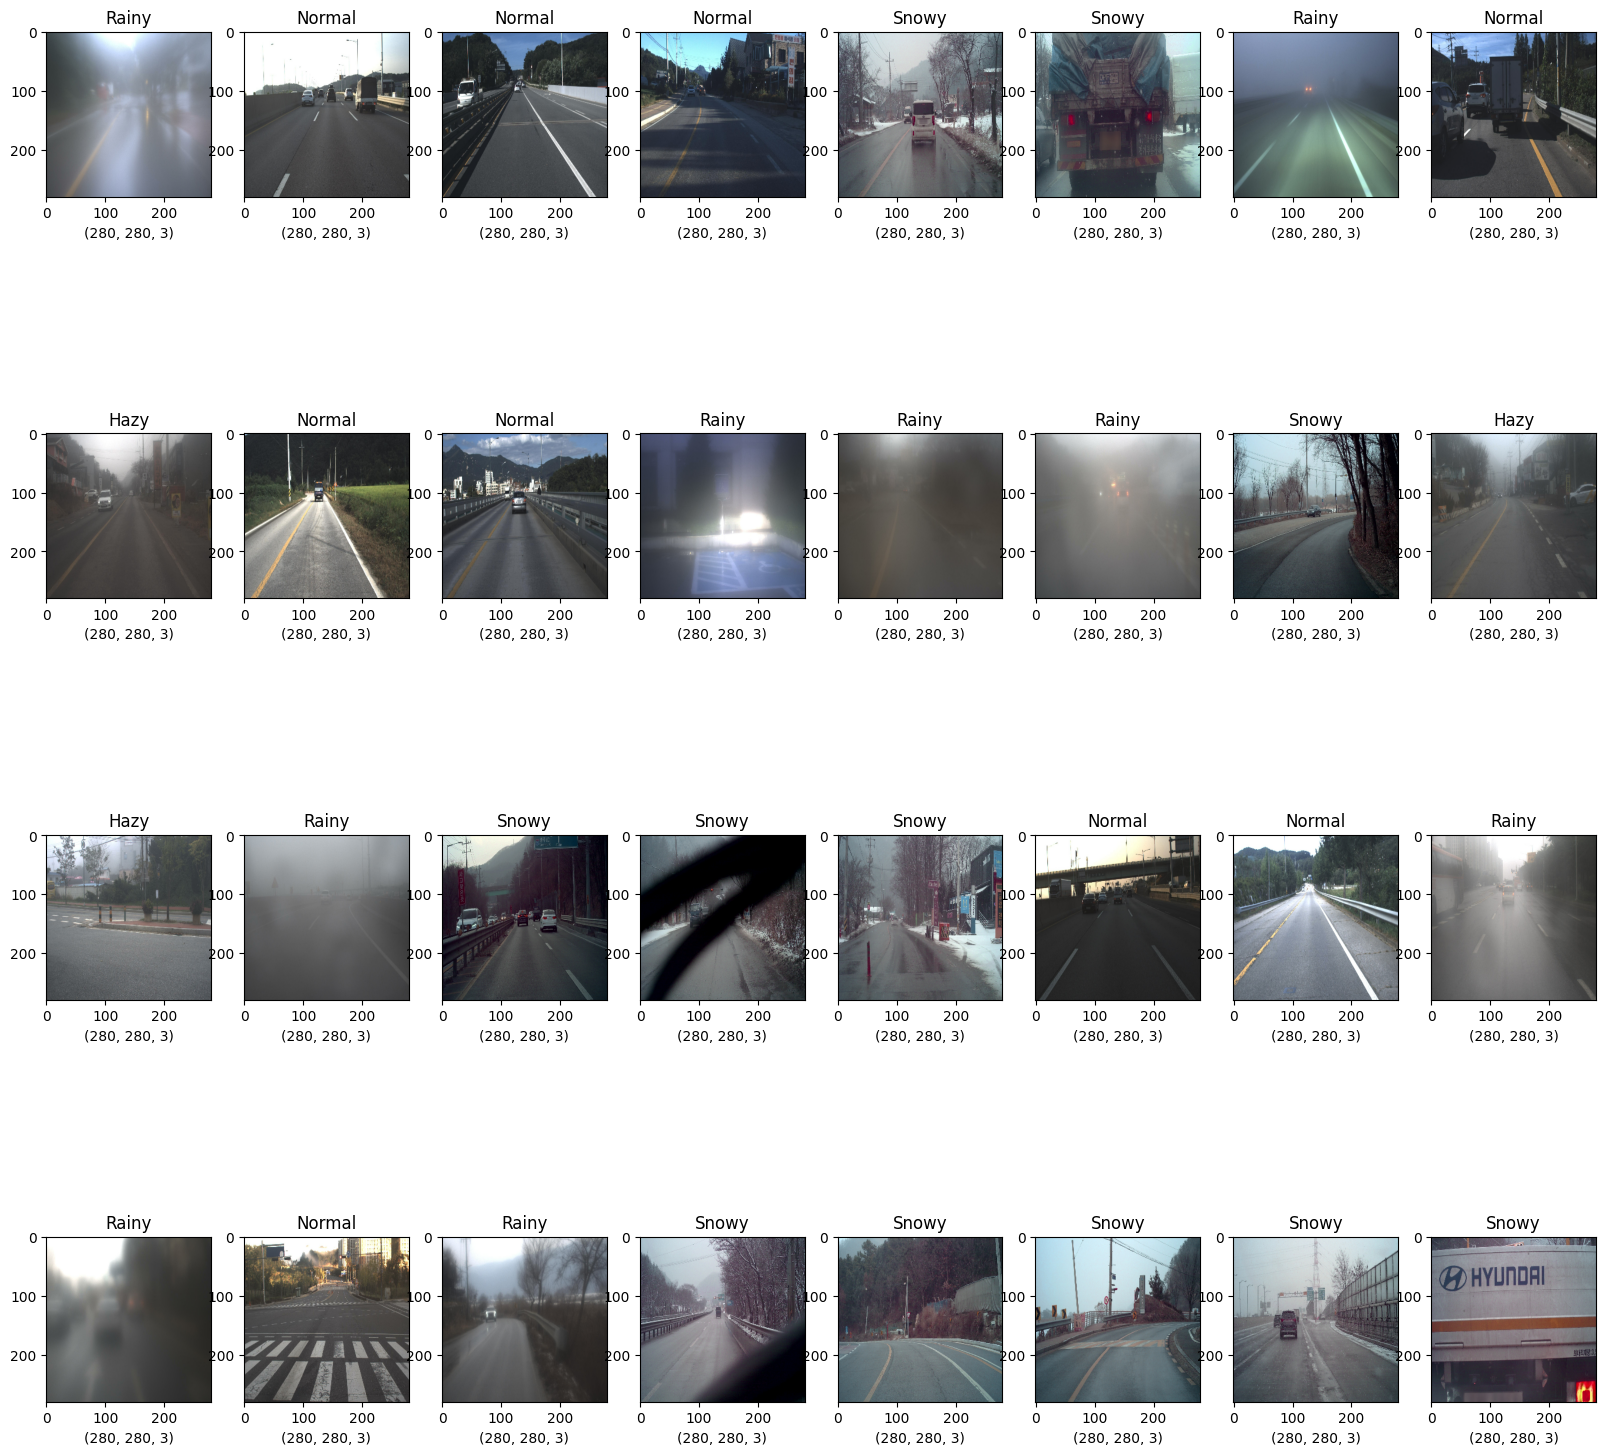

In [5]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in train_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 2. 데이터 split

In [6]:
test_ds = image_dataset_from_directory(
    directory=path+'//Validation',
    labels = 'inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(280,280),
    seed=100
)

Found 5738 files belonging to 4 classes.


In [7]:
test_ds.class_names

['Hazy', 'Normal', 'Rainy', 'Snowy']

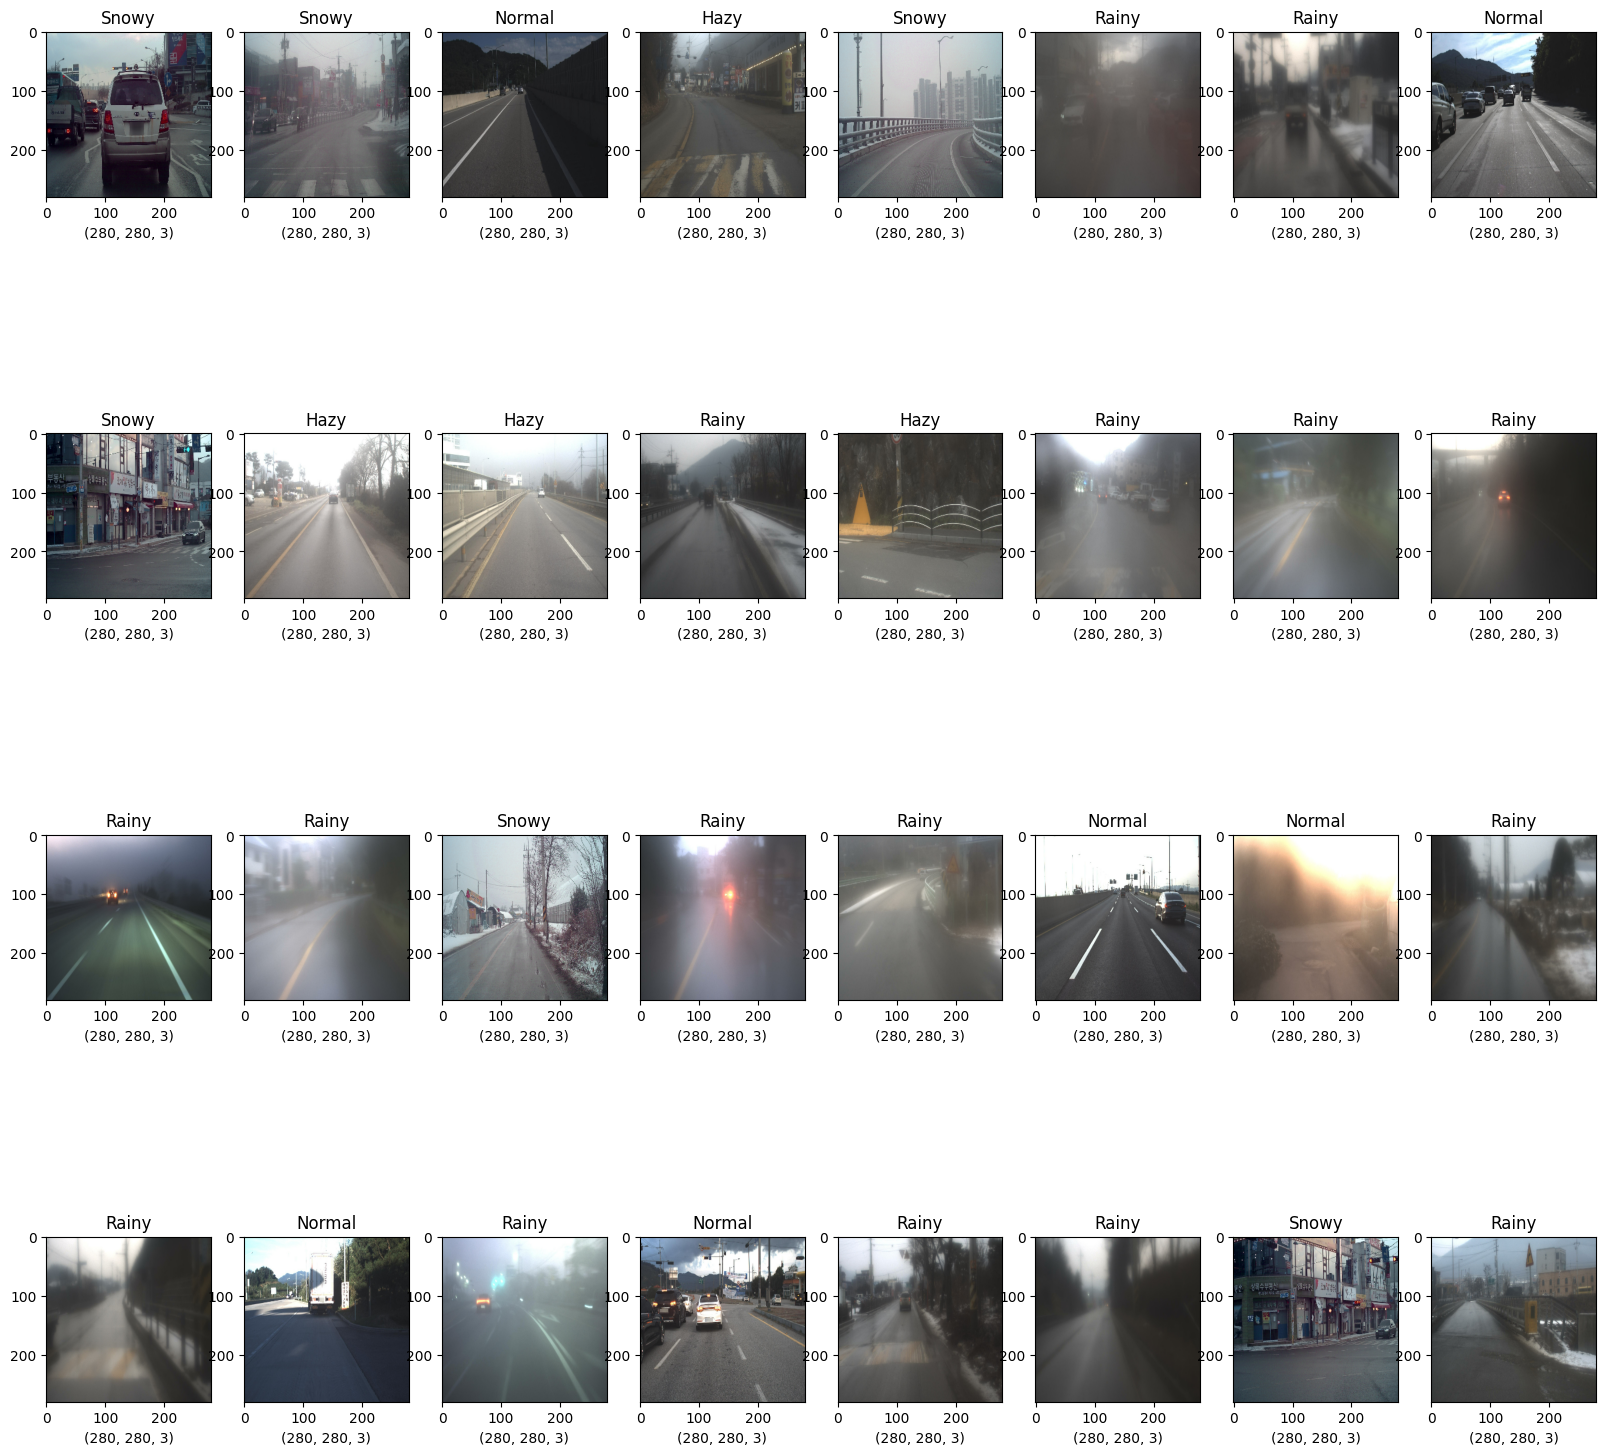

In [8]:
import matplotlib.pyplot as plt
import numpy as np


for images,labels in test_ds.take(1):
    # print(labels)
    plt.figure(figsize=(20,20))
    for i in range(32):
        # print(train_ds.class_names[np.argmax(labels[0][i])])
        # print(labels[0][i])
        plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[np.argmax(labels[i])])
        plt.xlabel(images[i].numpy().astype('uint8').shape)

##### 3. 모델 구성

In [9]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


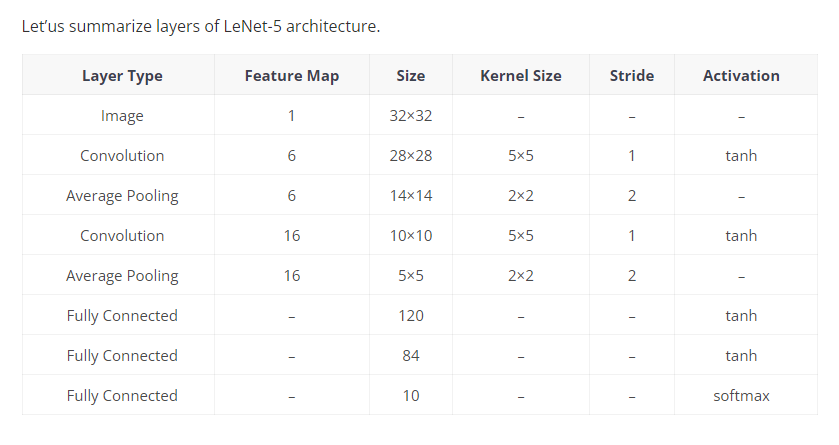

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import experimental,Conv2D,AveragePooling2D,Flatten,Dense,Dropout

model = Sequential(

    [
    experimental.preprocessing.Rescaling(1./255,input_shape=(280,280,3)),
    # strides = 1 (default)
    Conv2D(6,5,activation='tanh',padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Dropout(0.3),
    # strides = 1 (default)
    Conv2D(16,5,activation='tanh',padding='valid'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Dropout(0.3),
    Flatten(),
    Dense(120,activation='tanh'),
    Dense(84,activation='tanh'),
    Dense(4,activation='softmax')
    ]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 280, 280, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 140, 140, 6)      0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 140, 140, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 136, 136, 16)      2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 68, 68, 16)       0         
 ePooling2D)                                            

In [12]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

##### 4. 학습

In [13]:
history = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10


1148/1148 [==============================] - 71s 56ms/step - loss: 1.3353 - acc: 0.3986 - val_loss: 1.3188 - val_acc: 0.4012
Epoch 2/10
1148/1148 [==============================] - 75s 65ms/step - loss: 1.3199 - acc: 0.4003 - val_loss: 1.3275 - val_acc: 0.4010
Epoch 3/10
1148/1148 [==============================] - 72s 62ms/step - loss: 1.3178 - acc: 0.4038 - val_loss: 1.3177 - val_acc: 0.4010
Epoch 4/10
1148/1148 [==============================] - 63s 55ms/step - loss: 1.3173 - acc: 0.4040 - val_loss: 1.3190 - val_acc: 0.4012
Epoch 5/10
1148/1148 [==============================] - 60s 52ms/step - loss: 1.3197 - acc: 0.4009 - val_loss: 1.3177 - val_acc: 0.4010
Epoch 6/10
1148/1148 [==============================] - 61s 53ms/step - loss: 1.3177 - acc: 0.4038 - val_loss: 1.3261 - val_acc: 0.4010
Epoch 7/10
1148/1148 [==============================] - 62s 53ms/step - loss: 1.3184 - acc: 0.4023 - val_loss: 1.3198 - val_acc: 0.4010
Epoch 8/10
1148/1148 [==============================] - 61s

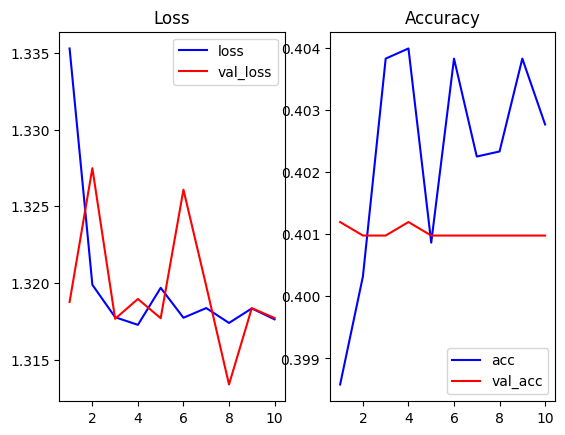

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(range(1,len(loss)+1),loss,color='blue',label='loss')
plt.plot(range(1,len(loss)+1),val_loss,color='red',label='val_loss')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(acc)+1),acc,color='blue',label='acc')
plt.plot(range(1,len(acc)+1),val_acc,color='red',label='val_acc')
plt.title("Accuracy")
plt.legend()
plt.show()

##### 5.검증

In [15]:
model.evaluate(test_ds)

180/180 [==============================] - 10s 53ms/step - loss: 1.3166 - acc: 0.4033


[1.3166370391845703, 0.4032764136791229]